<a href="https://colab.research.google.com/github/marty916/AI-Training-Colab-Notebooks/blob/main/Fundamentals%20of%20Data%20Science/24_04_09_AI_CreditCardFraudDetectionSolutionFile_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

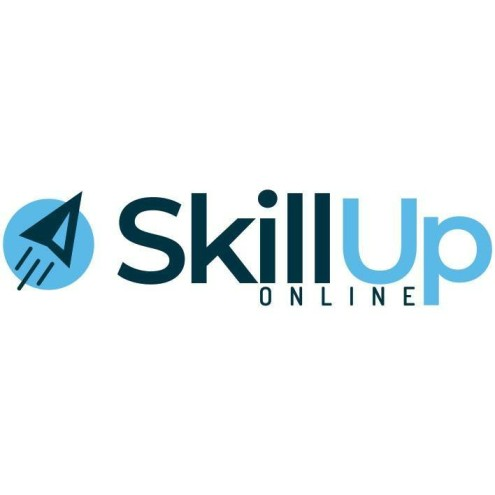

# **Project 1 - Credit Card Fraud Detection**

Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importing Necessary Libraries

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import and read dataset

In [ ]:
# Read Data into a Dataframe
df = pd.read_csv('creditcard.csv')


<details><summary><b>Click Here for the Hint</b></summary>



```
Start by importing the pandas library: import pandas as pd
    
Use the read_csv() function to load the CSV file into a pandas DataFrame. Specify the file path in the parentheses, for example: pd.read_csv("file_path.csv")
    
Assign the resulting DataFrame to a variable name, for example: data = pd.read_csv("file_path.csv")
    
Use the head() method on the DataFrame to display the first 10 rows, for example: data.head(10)
    
Make sure to replace "file_path.csv" with the actual file path and name of your CSV file.

```



</details>

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Cleaning

a. Missing Value

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<details><summary><b>Click Here for the Hint</b></summary>



```

    Use the DataFrame variable name followed by the isnull() method to create a Boolean DataFrame where True indicates a null value and False indicates a non-null value.

    Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of null values) in each column.

    Putting these together, the code would look like this: data.isnull().sum()


    This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```



</details>

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


b. Duplicate data

In [ ]:
df.duplicated().sum()

1081

<details><summary><b>Click Here for the Hint</b></summary>



```
Use the DataFrame variable name followed by the duplicated() method to create a Boolean DataFrame where True indicates a duplicate row and False indicates a non-duplicate row.

Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of duplicate rows).

Putting these together, the code would look like this: data.duplicated().sum()

This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```



</details>

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

### Data Analysis

Question 1: What is the percentage of fraud transactions in the dataset?



In [ ]:
# Calculate the percentage of fraud transactions
fraud_percentage = (df['Class'].sum() / len(df)) * 100

# Print the percentage of fraud transactions
print(f"The percentage of fraud transactions: {fraud_percentage:.2f}%")


The percentage of fraud transactions: 0.17%


<details>
  <summary><b>Click Here for the Hint</b></summary>
Hint: To calculate the percentage of fraud transactions, you need to count the number of fraud transactions (where 'Class' is 1) and divide it by the total number of transactions in the dataset. Then, multiply the result by 100 to get the percentage.
</details>

Question 2: What is the average transaction amount for fraud transactions?



In [ ]:
# Calculate the average transaction amount for fraud transactions
fraud_data = df[df['Class'] == 1]
average_fraud_amount = fraud_data['Amount'].mean()

# Print the average transaction amount for fraud transactions
print(f"The average transaction amount for fraud transactions: ${average_fraud_amount:.2f}")


The average transaction amount for fraud transactions: $123.87


<details>
  <summary><b>Click Here for the Hint</b></summary>
Hint: To calculate the average transaction amount for fraud transactions, you need to filter the dataset to get only the fraud transactions (Class = 1) and then calculate the mean of the 'Amount' column for that filtered data.
</details>

### Data Visualization

Question 1: How many fraud transactions are there compared to non-fraud transactions? (Using a bar plot)

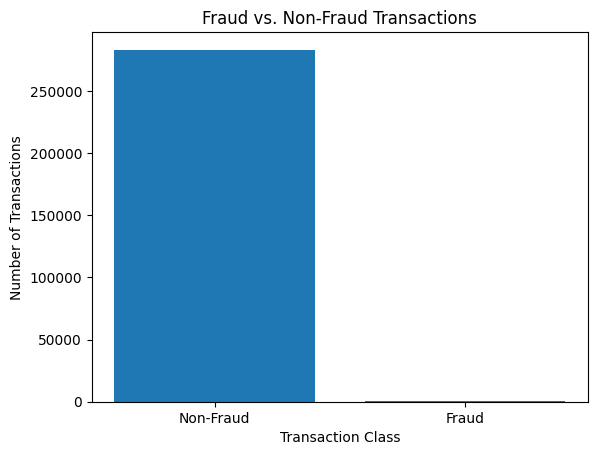

In [ ]:
# Count the number of fraud and non-fraud transactions
fraud_counts = df['Class'].value_counts()

# Plot the distribution of fraud transactions compared to non-fraud transactions
plt.bar(['Non-Fraud', 'Fraud'], fraud_counts)
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.show()

<details>
  <summary><b>Click Here for the Hint</b></summary>
Hint: To create a bar plot showing the number of fraud and non-fraud transactions, you need to count the occurrences of each class (fraud and non-fraud) in the 'Class' column and then use a bar plot to represent the counts.
</details>

Question 2: What is the distribution of transaction amounts for fraud transactions? (Using a histogram)


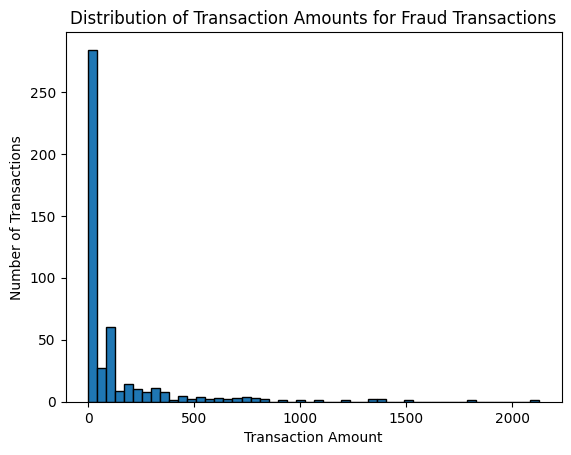

In [ ]:
# Separate the data for fraud transactions
fraud_data = data[data['Class'] == 1]

# Plot the distribution of transaction amounts for fraud transactions
plt.hist(fraud_data['Amount'], bins=50, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Amounts for Fraud Transactions')
plt.show()

<details>
  <summary><b>Click Here for the Hint</b></summary>

Hint: To visualize the distribution of transaction amounts for fraud transactions, you need to filter the dataset to get only the fraud transactions (Class = 1) and then use a histogram to represent the distribution of 'Amount' values in that filtered data.
</details>

## Model Development & Evaluation

### Splitting Dataset

In [ ]:
# spliting training and testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = df.drop('Class', axis=1)
y = df.Class
X = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<details><summary><b>Click Here for the Hint</b></summary>



```
Once you have this dataset, you can use the scikit-learn library to split the data into training and testing sets using the train_test_split() function.

First, you can create a pandas DataFrame X with all columns except the 'Class' column. You can create a pandas Series y with only the 'Class' column.

Next, you can use the train_test_split() function to split the data into training and testing sets. You can pass in the X and y variables as arguments, along with the test_size argument to specify the proportion of the dataset that should be allocated to the testing set (in this case, 20%). The random_state argument can also be set to a fixed value so that the same random split is produced every time the code is run.

The train_test_split() function returns four variables: X_train, X_test, y_train, and y_test. X_train and y_train represent the training set, while X_test and y_test represent the testing set. You can use these variables to train and evaluate your machine learning models.

Note that it's important to split the data into training and testing sets to avoid overfitting and to evaluate the performance of your models on unseen data.

```



</details>

### Modeling & Evaluation

In [ ]:
#Write Your Code Here
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
print(model_rfc.score(X_train,y_train))
print(model_rfc.score(X_test,y_test))
y_predict = model_rfc.predict(X_test)

1.0
0.9995770627004547


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
print(confusion)

           predicted fraud  predicted normal
is Fraud                65                22
is Normal                2             56657


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.97      0.75      0.84        87

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



<details><summary><b>Click Here for the Hint</b></summary>



```
You need to have imported the necessary libraries and classes, such as the RandomForestClassifier class from scikit-learn and the classification_report() and accuracy_score() functions from the sklearn.metrics module.

Once you have done this, you can create an instance of the RandomForestClassifier class, setting the max_depth hyperparameter to 150 and the random_state hyperparameter to 42. You can then train the model on the training data using the .fit() method.

Next, you can use the trained model to make predictions on the testing data using the .predict() method. You can store these predictions in a variable called y_pred.

Then, you can use the classification_report() function to print out a summary of the model's performance on the testing data. This will include metrics such as precision, recall, and F1 score for each class (in this case, whether a credit card transaction is fraud or not). You can also use the accuracy_score() function to calculate and print the overall accuracy of the model on the testing data.

Finally, you can print out the accuracy of the model in percentage form, using the *100 operator to multiply the accuracy score by 100.

```



</details>